# Season compare
All of the data fetching runs through [pybaseball](https://github.com/jldbc/pybaseball). Fetch the latest code (repo's still updated, but last published to pypi years ago)

In [3]:
%pip install git+https://github.com/jldbc/pybaseball.git/
from pybaseball import schedule_and_record

  Cloning https://github.com/jldbc/pybaseball.git/ to /private/var/folders/89/p_nbl66j2fx8pdszq3c5m32c0000gn/T/pip-req-build-o2k6y37p
  Running command git clone -q https://github.com/jldbc/pybaseball.git/ /private/var/folders/89/p_nbl66j2fx8pdszq3c5m32c0000gn/T/pip-req-build-o2k6y37p
  Resolved https://github.com/jldbc/pybaseball.git/ to commit aa093f9d52054b8b7ec5988deb2a8dbb7fcb0f89
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
You should consider upgrading via the '/Users/johndowling/Projects/SeasonMetricsCompareAtGame/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
def get_wins(record):
    """
    Extracts the number of wins from a baseball record string.
    
    Args:
        record (str): The baseball record string in the format "W-L-T".
        
    Returns:
        int: The number of wins.
    """
    return int(record.split('-')[0])

def get_wins_after_games(team_season_data, games_played):
    """
    Calculates the number of wins after a specified number of games.
    
    Args:
        team_season_data (DataFrame): The DataFrame containing the team's season data.
        games_played (int): The number of games to consider.
        
    Returns:
        int: The number of wins after the specified number of games.
    """
    # return 0 if out of bounds GP (assuming post 1962 and no tiebreakers for now)
    if games_played < 1 or games_played > 162:
        return 0
    # get the W-L record for the given games_played
    record = team_season_data.loc[games_played, 'W-L']
    
    # Extract and return the number of wins
    return get_wins(record)

Define teams + seasons and go get the respective data

In [5]:
teamA = 'CHA'
teamB = 'CHA'
yearA = 2024
yearB = 2025

the_last = schedule_and_record(yearA, teamA)
this_time = schedule_and_record(yearB, teamB)


Define GP

In [6]:
games_played = 15

# Check if games_played is within each data's range
if games_played < 1 or games_played + 1 > len(the_last) or games_played + 1 > len(this_time):
    print(f"Games played {games_played} is out of range for {teamA} {yearA} or {teamB} {yearB}.")
attributes = dir(this_time)
print(f"Attributes of the_last: {attributes}")
print(f"number of games played: {len([x for x in this_time['W-L'] if x != None])}")
print(f"number of games played: {len([x for x in the_last['W-L'] if x != None])}")
# print(this_time['W-L'])
# print(this_time['R'])
# print(this_time['RA'])
# print(this_time[1])

Attributes of the_last: ['Attendance', 'Date', 'GB', 'Home_Away', 'Inn', 'Loss', 'Opp', 'R', 'RA', 'Rank', 'Save', 'Streak', 'T', 'Time', 'Tm', 'Win', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new

Generate win data and plot

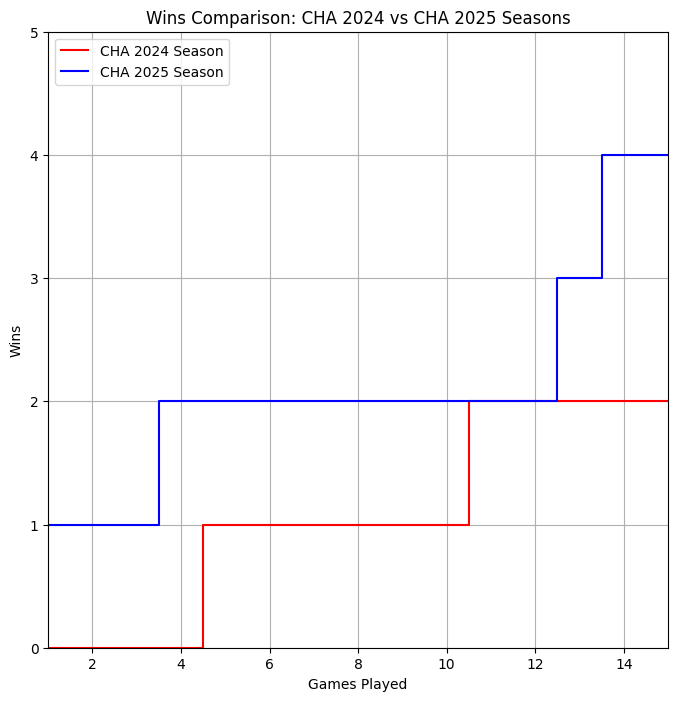

In [8]:
import numpy as np

import matplotlib.pyplot as plt

from io import BytesIO
from matplotlib.ticker import MaxNLocator

# Generate two sets of data
x = np.arange(1, games_played + 1)
y1 = [get_wins_after_games(the_last, i) for i in x]
y2 = [get_wins_after_games(this_time, i) for i in x]

# Create a step line plot
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(8, 8))
plt.step(x, y1, label=teamA + ' ' + str(yearA) + ' Season', where='mid', color='red')
plt.step(x, y2, label=teamB + ' ' + str(yearB) + ' Season', where='mid', color='blue')

# Add labels, title, and legend
plt.xlabel('Games Played')
plt.xlim(1, games_played)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Wins')
plt.ylim(0, max(max(y1), max(y2)) + 1)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Wins Comparison: ' + teamA + ' ' + str(yearA) + ' vs ' + teamB + ' ' + str(yearB) + ' Seasons')
plt.legend(loc='upper left')
plt.grid(True)

# Set the aspect ratio to be equal
# plt.gca().set_aspect('equal', adjustable='box')

# Save the plot to a BytesIO buffer
buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Store the raw image data in a variable
raw_image_data = buffer.getvalue()

# Close the buffer
buffer.close()

# Show the plot
plt.show()

Graphs are nice. What about some numbers on a page?

http://www.baseball-reference.com/teams/COL/2025-schedule-scores.shtml


/Users/johndowling/Projects/WLCompare/.venv/lib/python3.10/site-packages/pybaseball/team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


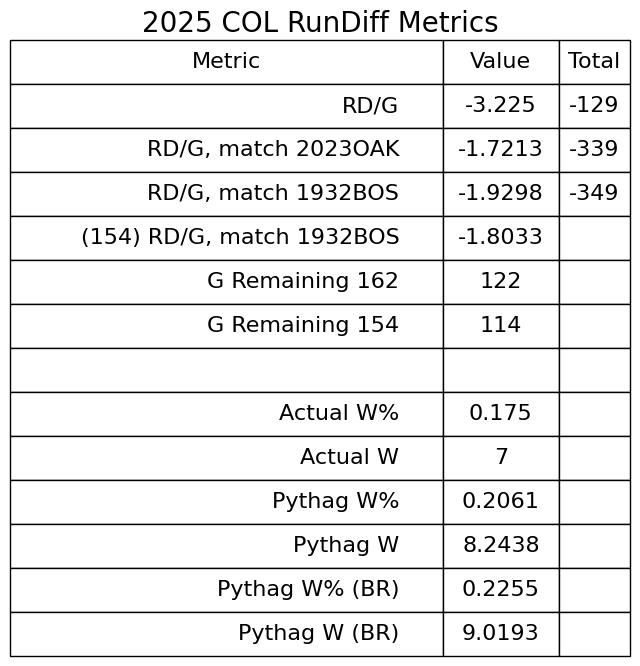

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

games_played = 40

team = 'COL'
year = 2025

oak_2023_diff = -339
bos_1932_diff = -349
total_games_modern = 162
total_games_olden = 154

diff_data = schedule_and_record(year, team)

# Check if games_played is within the data's range
if games_played < 1 or games_played > len([record for record in diff_data['W-L'] if record != None]):
    print(f"Games played {games_played} is out of range for {team} {year}.")
else:
    # Get the run differential for the specified number of games
    run_diff = diff_data['R'].sum() - diff_data['RA'].sum()
    # RD mean
    run_diff_per_game = run_diff / games_played
    # games remaining, modern season
    games_remaining_modern = total_games_modern - games_played
    # games remaining, olden season
    games_remaining_olden = total_games_olden - games_played if total_games_olden > games_played else 0
    # calculate the run differential per game required to match the 2023 OAK run differential
    run_diff_per_game_modern_record = (oak_2023_diff - run_diff) / games_remaining_modern if games_remaining_modern > 0 else "---"
    # calculate the run differential per game required to match the 1932 BOS run differential
    run_diff_per_game_olden_record = (bos_1932_diff - run_diff) / games_remaining_olden if games_remaining_olden > 0 else "---"
    # calculate the run differential per game required to match the 1932 BOS run differential with the modern season length
    run_diff_per_game_olden_record_modern_games = (bos_1932_diff - run_diff) / games_remaining_modern if games_remaining_modern > 0 else "---"
    # get the current win total
    current_wins = get_wins_after_games(diff_data, games_played)
    # calculate the current win percentage
    current_win_percentage = current_wins / games_played
    # calculate the pythagorean win percentage
    pythagorean_win_percentage = diff_data['R'].sum() ** 2 / (diff_data['R'].sum() ** 2 + diff_data['RA'].sum() ** 2)
    # calculate the pythagorean wins
    pythagorean_wins = pythagorean_win_percentage * games_played
    # caluclate the pythagorean win percentage, baseball-reference style
    pythagorean_win_percentage_br = (diff_data['R'].sum() ** 1.83) / ((diff_data['R'].sum() ** 1.83) + (diff_data['RA'].sum() ** 1.83))
    # calculate the pythagorean wins, baseball-reference style
    pythagorean_wins_br = pythagorean_win_percentage_br * games_played

    # Create a DataFrame to organize the data
    data = {
        "Metric": [
            "RD/G",
            "RD/G, match 2023OAK",
            "RD/G, match 1932BOS",
            "(154) RD/G, match 1932BOS",
            "G Remaining 162",
            "G Remaining 154",
            "",
            "Actual W%",
            "Actual W",
            "Pythag W%",
            "Pythag W",
            "Pythag W% (BR)",
            "Pythag W (BR)"
        ],
        "Value": [
            round(run_diff_per_game, 4),
            round(run_diff_per_game_modern_record, 4),
            round(run_diff_per_game_olden_record, 4),
            round(run_diff_per_game_olden_record_modern_games, 4),
            f"{int(games_remaining_modern)}",
            int(games_remaining_olden),
            "",
            round(current_win_percentage, 4),
            int(current_wins),
            round(pythagorean_win_percentage, 4),
            round(pythagorean_wins, 4),
            round(pythagorean_win_percentage_br, 4),
            round(pythagorean_wins_br, 4)
        ],
        "Total": [
            f"{int(run_diff)}",
            oak_2023_diff,
            bos_1932_diff,
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
        ]
    }
    df = pd.DataFrame(data)

    # Render the DataFrame as a table image
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(f"{year} {team} RunDiff Metrics", fontsize=20)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    # Right-align the first column
    for (row, col), cell in table.get_celld().items():
        if col == 0 and row > 0:  # First column, skip header row
            cell.set_text_props(ha='right')  # Set horizontal alignment to 'right'
    
    # Show the table as an image
    plt.show()


# Posting through it

We have our data. So let's post about it.

In [6]:
# Generate Bluesky post text
bluesky_post = (
    f"Here's a comparison of the {teamA} {yearA} season vs the {teamB} {yearB} season after {games_played} games. "
    "The plot shows the number of wins for each team as the season progresses. "
    f"After {games_played} games, the {teamA} {yearA} season has {y1[-1]} wins, while the {teamB} {yearB} season has {y2[-1]} wins."
)

# Generate image alt text
image_alt_text = (
    f"A step line plot comparing the wins of the {teamA} {yearA} season and the {teamB} {yearB} season. "
    f"The x-axis represents the number of games played (1 to {games_played}), and the y-axis represents the number of wins. "
    f"The {teamA} {yearA} season is shown in red, and the {teamB} {yearB} season is shown in blue. "
    f"After {games_played} games, the {teamA} {yearA} season has {y1[-1]} wins, while the {teamB} {yearB} season has {y2[-1]} wins."
)


In [8]:
%pip install atproto pyyaml
import yaml
from atproto import Client

# Load login credentials from secrets.yaml
with open('secrets.yaml', 'r') as file:
    secrets = yaml.safe_load(file)

username = secrets['bluesky']['username']
password = secrets['bluesky']['password']

client = Client()
client.login(username, password)

client.send_image(text=bluesky_post, image=raw_image_data, image_alt=image_alt_text)

You should consider upgrading via the '/Users/johndowling/Projects/WLCompare/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


CreateRecordResponse(uri='at://did:plc:zzzl7vjhqkgcwcny74jcnm2t/app.bsky.feed.post/3loykpb4oob2y', cid='bafyreia2z5hckf34hmph72xn7vbobzb7ip43skl23uykaiqzxk7treblzq')